In [99]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import random

# SEED = 42
# tf.random.set_seed(SEED)
# np.random.seed(SEED)
# random.seed(SEED)

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

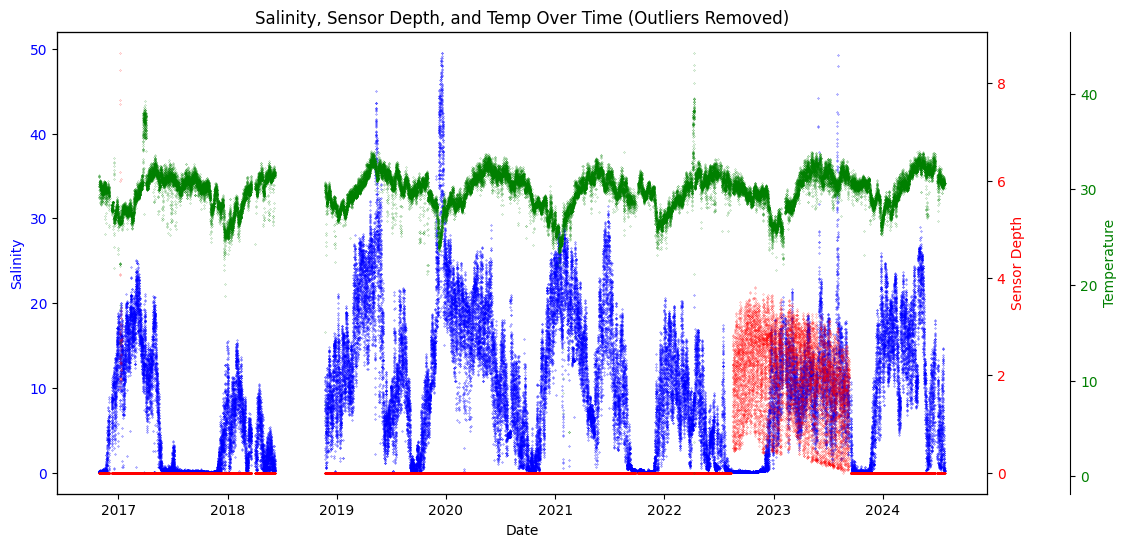

In [100]:
# Load the data
csv_file2 = '/Users/ratchanonkhongsawi/Desktop/CMKL/2nd/FALL/RND1/Data/cleaned_faifa_v2.csv'
df2 = pd.read_csv(csv_file2)

# Convert date_time to datetime format and set as the index
df2['date_time'] = pd.to_datetime(df2['date_time'], format='%Y-%m-%d %H:%M:%S')
df2.set_index('date_time', inplace=True)

# Filter for columns 'Salinity' and 'Sensor_Depth' and remove rows with NaN values
df2 = df2.loc[: , ['Salinity', 'Sensor_Depth', 'Temperature']].dropna()

# Remove outliers in Sensor_Depth (e.g., values below -10, assuming they're erroneous)
df2 = df2[(df2['Salinity'] > 0) & (df2['Salinity'] < 50)]

# Plot both columns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Salinity data
ax1.plot(df2.index, df2['Salinity'], '.', markersize=0.5, label='Salinity', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Salinity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the scaled Sensor_Depth
ax2 = ax1.twinx()
ax2.plot(df2.index, df2['Sensor_Depth'], '.', markersize=0.3, label='Sensor Depth', color='r')
ax2.set_ylabel('Sensor Depth', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Plot Temperature data on the third y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset for the third axis
ax3.plot(df2.index, df2['Temperature'], '.', markersize=0.3, label='Temperature', color='g')
ax3.set_ylabel('Temperature', color='g')
ax3.tick_params(axis='y', labelcolor='g')

# Title and show plot
plt.title('Salinity, Sensor Depth, and Temp Over Time (Outliers Removed)')
plt.show()

In [101]:
df = df2.loc['2019-01-01':, ['Salinity']].dropna()

# Define column indices dictionary for df
column_indices = {name: i for i, name in enumerate(df.columns)}

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'Salinity' column to 2D (necessary for scikit-learn scalers)
salinity_normalized = scaler.fit_transform(df[['Salinity']])

# Replace the 'Salinity' column in the original DataFrame with the normalized values
df['Salinity'] = salinity_normalized

# Split data into training, validation, and test sets
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

# Define number of features based on df1's columns
num_features = df.shape[1]
print(df.head())

                     Salinity
date_time                    
2019-01-01 00:00:00  0.101171
2019-01-01 01:00:00  0.096713
2019-01-01 02:00:00  0.094812
2019-01-01 03:00:00  0.092087
2019-01-01 04:00:00  0.091979


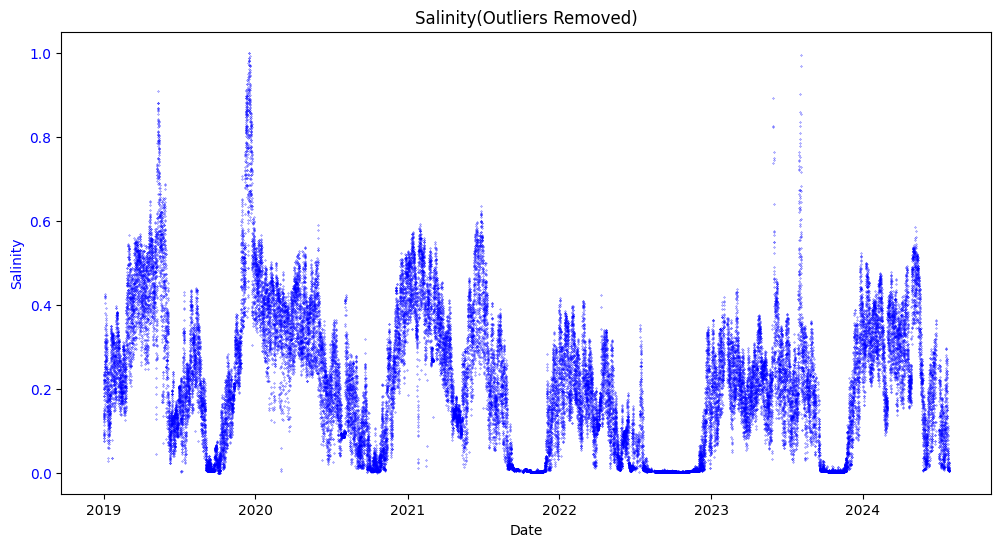

In [102]:
# Plot both columns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Salinity data
ax1.plot(df.index, df['Salinity'], '.', markersize=0.5, label='Salinity', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Salinity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Title and show plot
plt.title('Salinity(Outliers Removed)')
plt.show()

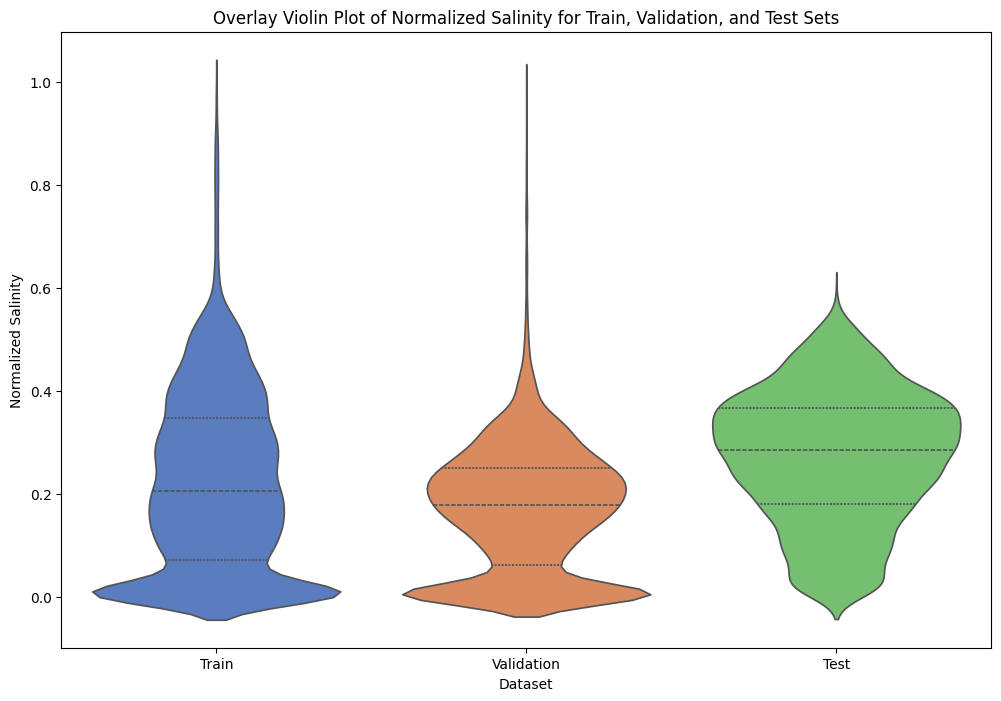

In [103]:
# Assuming you have your data as Pandas DataFrames
af_train_df_graph = pd.DataFrame(train_df, columns=['Salinity'])
af_val_df_graph = pd.DataFrame(val_df, columns=['Salinity'])
af_test_df_graph = pd.DataFrame(test_df, columns=['Salinity'])
# train_df, val_df, and test_df should already be normalized

# Combine the data into a single DataFrame for visualization
af_train_df_graph['Dataset'] = 'Train'
af_val_df_graph['Dataset'] = 'Validation'
af_test_df_graph['Dataset'] = 'Test'

# Stack the data for plotting
combined_af_df = pd.concat([af_train_df_graph, af_val_df_graph, af_test_df_graph])

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=combined_af_df, x='Dataset', y='Salinity', hue='Dataset', inner='quartile', palette='muted', legend=False)

# Add title and labels
plt.title("Overlay Violin Plot of Normalized Salinity for Train, Validation, and Test Sets")
plt.xlabel("Dataset")
plt.ylabel("Normalized Salinity")

# Display the plot
plt.show()

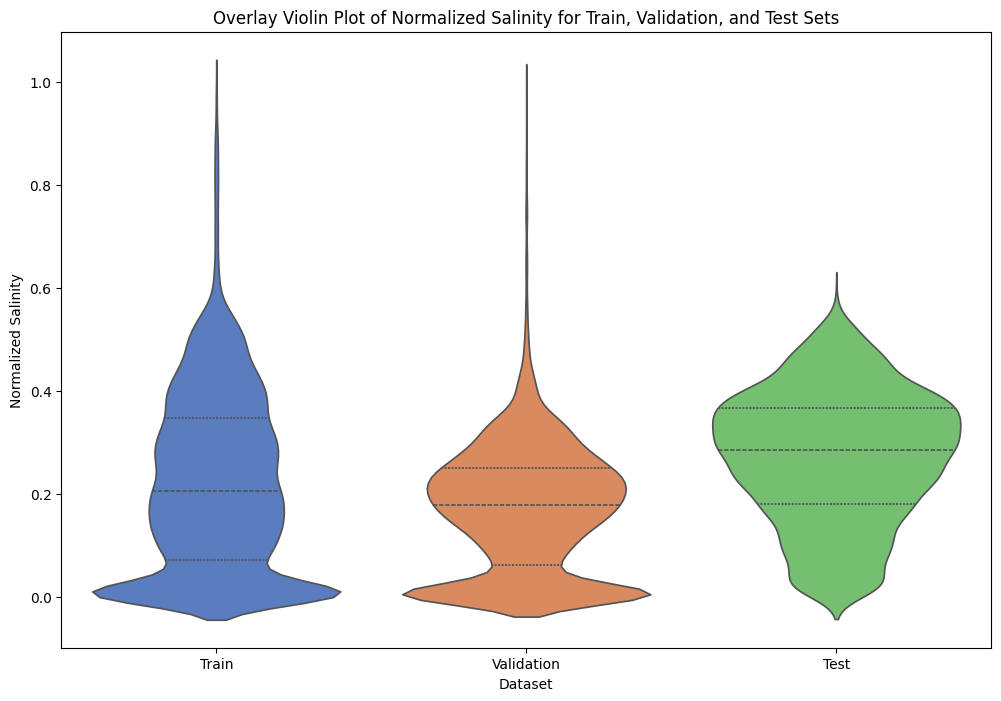

In [104]:
# Assuming you have your data as Pandas DataFrames
af_train_df_graph = pd.DataFrame(train_df, columns=['Salinity'])
af_val_df_graph = pd.DataFrame(val_df, columns=['Salinity'])
af_test_df_graph = pd.DataFrame(test_df, columns=['Salinity'])
# train_df, val_df, and test_df should already be normalized

# Combine the data into a single DataFrame for visualization
af_train_df_graph['Dataset'] = 'Train'
af_val_df_graph['Dataset'] = 'Validation'
af_test_df_graph['Dataset'] = 'Test'

# Stack the data for plotting
combined_af_df = pd.concat([af_train_df_graph, af_val_df_graph, af_test_df_graph])

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=combined_af_df, x='Dataset', y='Salinity', hue='Dataset', inner='quartile', palette='muted', legend=False)

# Add title and labels
plt.title("Overlay Violin Plot of Normalized Salinity for Train, Validation, and Test Sets")
plt.xlabel("Dataset")
plt.ylabel("Normalized Salinity")

# Display the plot
plt.show()

In [105]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [106]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [107]:
def plot(self, model=None, plot_col='Salinity', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [108]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [109]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

@example.setter
def example(self, value):
    """Set the example batch manually."""
    self._example = value

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [110]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Salinity'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Salinity']

In [115]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:single_step_window.total_window_size]),
                           np.array(train_df[100:100+single_step_window.total_window_size]),
                           np.array(train_df[200:200+single_step_window.total_window_size])])

example_inputs, example_labels = single_step_window.split_window(example_window)

In [116]:
single_step_window.example = example_inputs, example_labels

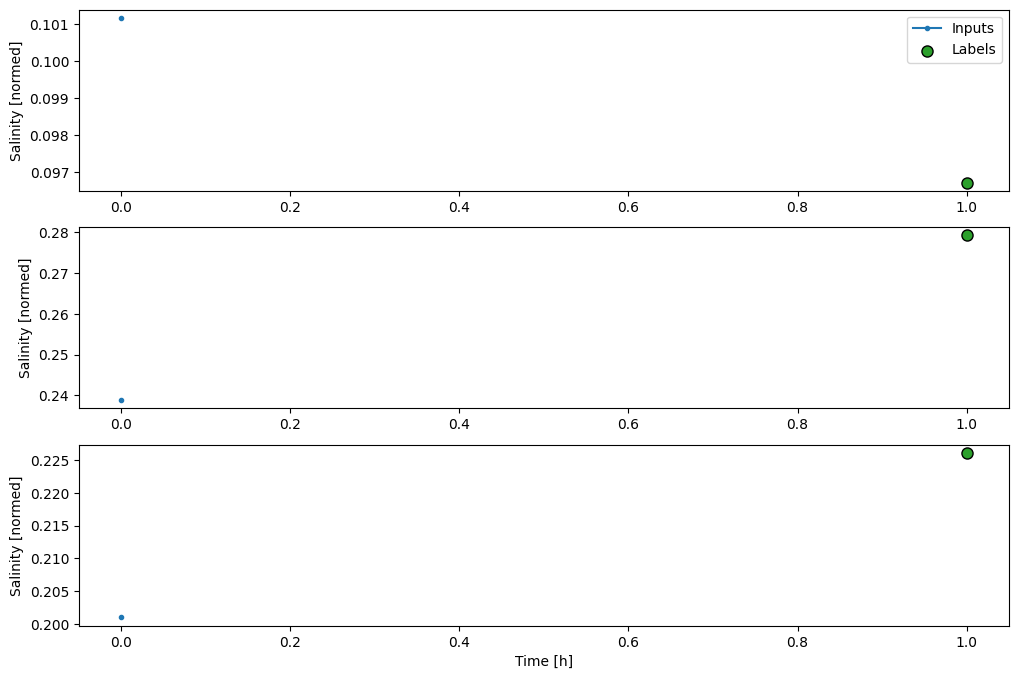

In [117]:
single_step_window.plot()

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['Salinity'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 5.1475e-04 - mean_absolute_error: 0.0134


In [ ]:
wide_window = WindowGenerator(
    input_width=48, label_width=1, shift=1,
    label_columns=['Salinity'])

wide_window

Total window size: 49
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48]
Label column name(s): ['Salinity']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 48, 1)
Output shape: (32, 48, 1)


In [ ]:
# Stack three slices, each of length equal to the total window size
example_wide_window = tf.stack([
    np.array(train_df[:wide_window.total_window_size]),
    np.array(train_df[100:100 + wide_window.total_window_size]),
    np.array(train_df[200:200 + wide_window.total_window_size])
])

# Split the stacked slices into inputs and labels
wide_example_inputs, wide_example_labels = wide_window.split_window(example_wide_window)

# Print shapes for verification
print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_wide_window.shape}')
print(f'Inputs shape: {wide_example_inputs.shape}')
print(f'Labels shape: {wide_example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 49, 1)
Inputs shape: (3, 48, 1)
Labels shape: (3, 1, 1)


In [ ]:
wide_window.example = (wide_example_inputs, wide_example_labels)

In [ ]:
# # Define the input layer
# input_layer = tf.keras.layers.Input(shape=(24, 1))

# # Apply the normalization layer
# normalized_input = normalization_layer(input_layer)

# # Create the Baseline model (identity model with normalization)
# baseline = tf.keras.Model(inputs=input_layer, outputs=normalized_input)

# # Compile the Baseline model
# baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
#                  metrics=[tf.keras.metrics.MeanAbsoluteError()])

# # Evaluate the model performance
# val_performance = {}
# performance = {}

# # Evaluate on the validation set
# val_performance['Baseline'] = baseline.evaluate(wide_window.val, return_dict=True)

# # Evaluate on the test set
# performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0, return_dict=True)

# # Print the evaluation results
# print("Validation Performance:", val_performance['Baseline'])
# print("Test Performance:", performance['Baseline'])

ValueError: x and y must be the same size

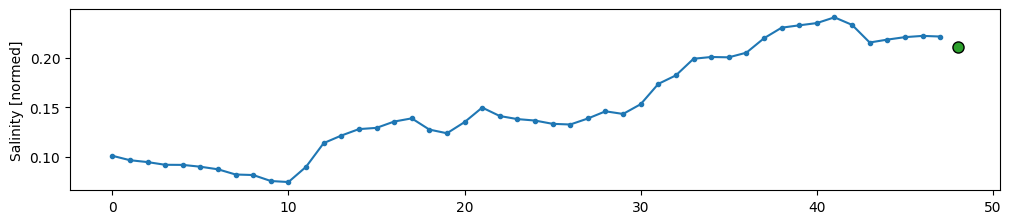

In [ ]:
wide_window.plot(baseline)

In [ ]:
MAX_EPOCHS = 30

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min',
                                                    restore_best_weights=True)

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
# Define the input layer
input_layer = tf.keras.layers.Input(shape=(24, 1))

# Apply the normalization layer
normalized_input = normalization_layer(input_layer)

# First LSTM layer
lstm_output32 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(normalized_input)

# Add a residual connection (input + LSTM output)
residual_output32 = tf.keras.layers.Add()([normalized_input,lstm_output32])
# Dense layer for final prediction
output_layer32 = tf.keras.layers.Dense(1)(residual_output32)

# Create the model
residual_lstm_model32 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer32)

In [ ]:
history = compile_and_fit(residual_lstm_model32, wide_window)

IPython.display.clear_output()
val_performance['LSTM32'] = residual_lstm_model32.evaluate(wide_window.val, return_dict=True)
performance['LSTM32'] = residual_lstm_model32.evaluate(wide_window.test, verbose=0, return_dict=True)
residual_lstm_model32.save('residual_lstm_model32.keras')

Epoch 1/30
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 72.7885 - mean_absolute_error: 6.5804 - val_loss: 29.8760 - val_mean_absolute_error: 4.8646
Epoch 2/30
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 12.4163 - mean_absolute_error: 2.8203 - val_loss: 28.8551 - val_mean_absolute_error: 4.4996
Epoch 3/30
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 10.1606 - mean_absolute_error: 2.4921 - val_loss: 42.9766 - val_mean_absolute_error: 5.5547
Epoch 4/30
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 10.9627 - mean_absolute_error: 2.5765 - val_loss: 27.9344 - val_mean_absolute_error: 4.2318
Epoch 5/30
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 9.1721 - mean_absolute_error: 2.3564 - val_loss: 28.5288 - val_mean_absolute_error: 4.2636
Epoch 6/30
 473/1009 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10.3890 - mean_absolute_error: 2.4616

KeyboardInterrupt: 

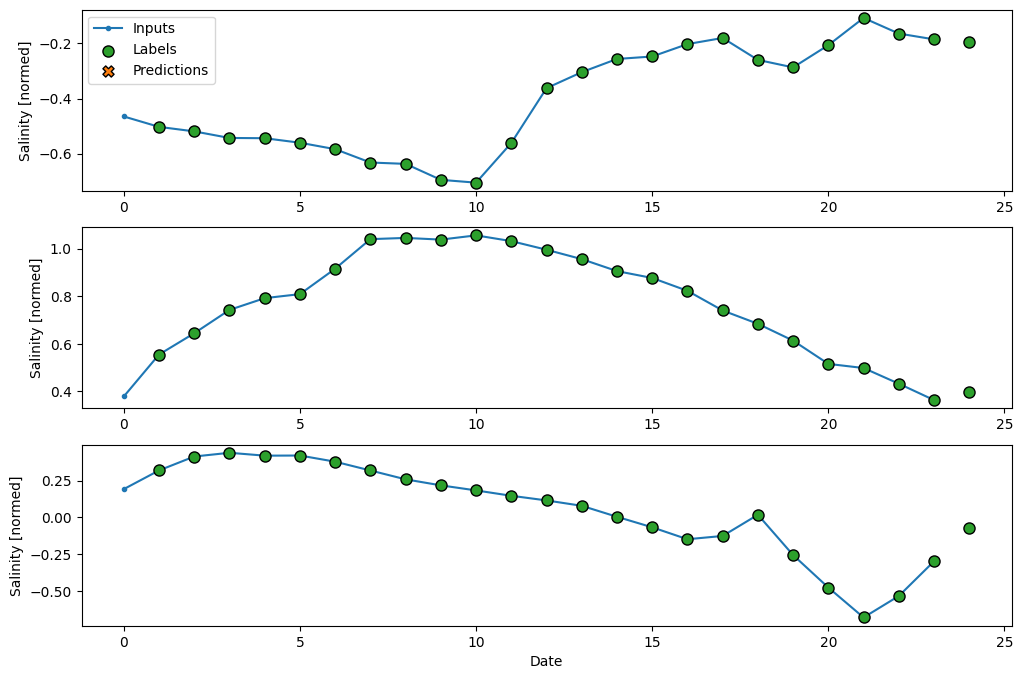

In [ ]:
wide_window.plot(residual_lstm_model32)

In [ ]:
# Define the input layer
input_layer = tf.keras.layers.Input(shape=(24, 1))

# Apply the normalization layer
normalized_input = normalization_layer(input_layer)

# First LSTM layer
lstm_output64 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(normalized_input)

# Add a residual connection (input + LSTM output)
residual_output64 = tf.keras.layers.Add()([normalized_input,lstm_output64])
# Dense layer for final prediction
output_layer64 = tf.keras.layers.Dense(1)(residual_output64)

# Create the model
residual_lstm_model64 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer64)

In [ ]:
history = compile_and_fit(residual_lstm_model64, wide_window)

IPython.display.clear_output()
val_performance['LSTM64'] = residual_lstm_model64.evaluate(wide_window.val, return_dict=True)
performance['LSTM64'] = residual_lstm_model64.evaluate(wide_window.test, verbose=0, return_dict=True)
residual_lstm_model64.save('residual_lstm_model64.keras')

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mean_absolute_error: nan


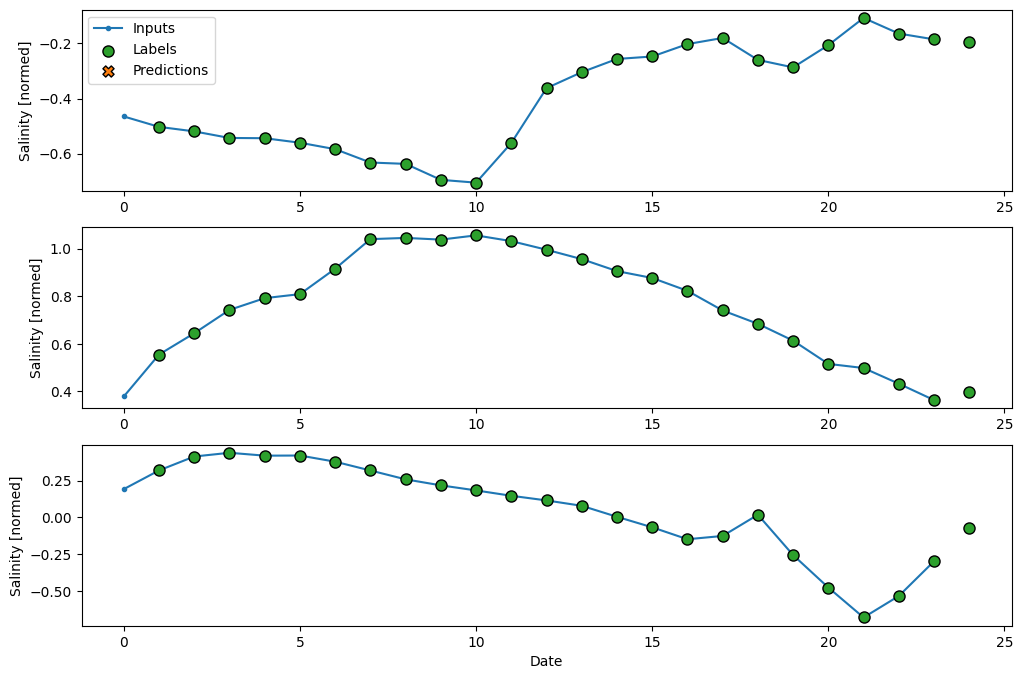

In [ ]:
wide_window.plot(residual_lstm_model64)

In [ ]:
cm = residual_lstm_model32.metrics[1]
cm.metrics

[<MeanAbsoluteError name=mean_absolute_error>]

In [ ]:
val_performance

{'Baseline': {'loss': nan, 'mean_absolute_error': nan},
 'LSTM32': {'loss': nan, 'mean_absolute_error': nan},
 'LSTM64': {'loss': nan, 'mean_absolute_error': nan}}

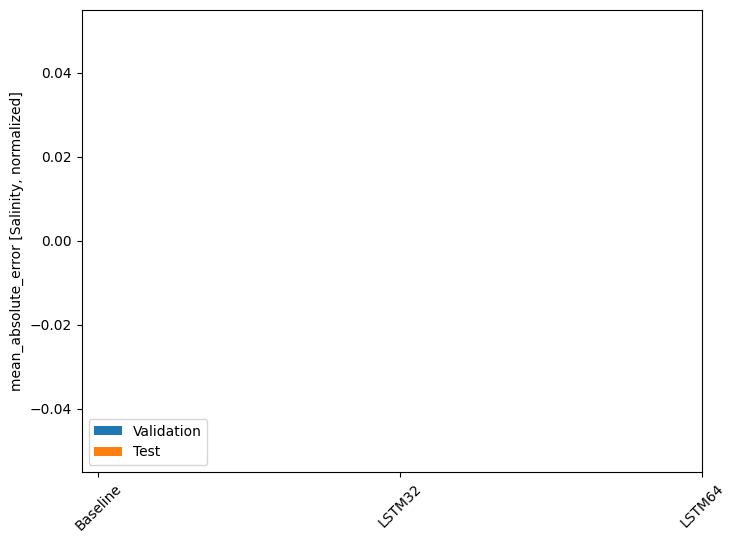

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.ylabel('mean_absolute_error [Salinity, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[metric_name]:0.4f}')

Baseline    : nan
LSTM32      : nan
LSTM64      : nan
